In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import copy
from PIL import Image


In [2]:
actions = ["up","down","left","right"]

In [3]:
def reward(x,y):
  if x == 48 and y == 12:
    return 100
  if x == 49 and y == 12:
    return 99
  if x>=0 and x<=49 and y==0:
    return -1
  if x>=0 and x<=49 and y==24:
    return -1
  if y>=0 and y<=24 and x==0:
    return -1
  if y>=0 and y<=24 and x==49:
    return -1
  if y>=13 and y<=24 and x==25:
    return -1
  if y>=13 and y<=24 and x==26:
    return -1
  if y>=0 and y<=11 and x==25:
    return -1
  if y>=0 and y<=11 and x==26:
    return -1
  return 0
def isWall(x,y):
  
  if x>=0 and x<=49 and y==0:
    return True
  if x>=0 and x<=49 and y==24:
    return True
  if y>=0 and y<=24 and x==0:
    return True
  if y>=0 and y<=24 and x==49:
    return True
  if y>=13 and y<=24 and x==25:
    return True
  if y>=13 and y<=24 and x==26:
    return True
  if y>=0 and y<=11 and x==25:
    return True
  if y>=0 and y<=11 and x==26:
    return True
  return False
  
def transition(x1,y1,action,x2,y2):
  if action is "up":
    if y2==y1+1 and x2==x1:
      return 0.8
    else:
      return 0.2/3
  if action is "down":
    if y2==y1-1 and x2==x1:
      return 0.8
    else:
      return 0.2/3
  if action is "left":
    if x2==x1-1 and y2==y1:
      return 0.8
    else:
      return 0.2/3
  if action is "right":
    if x2==x1+1 and y2==y1:
      return 0.8
    else:
      return 0.2/3

In [4]:
def value_iteration(gamma, threshold, T, actions):
  V = np.random.uniform(0,0,(50,25))
  Pi = np.zeros((50,25))-1
  for t in range(0,T):
    delta = 0
    U = copy.deepcopy(V)
    for i in range(0,50):
      for j in range(0,25):
        if isWall(i,j):
          continue
        max1 = -1e6
        for action in actions:
          sum1 = 0
          if isWall(i+1,j):
            sum1 = sum1 + transition(i,j,action,i+1,j)*(reward(i+1,j)+gamma*U[i][j])
          else:
            sum1 = sum1 + transition(i,j,action,i+1,j)*(reward(i+1,j)+gamma*U[i+1][j])
          if isWall(i-1,j):
            sum1 = sum1 + transition(i,j,action,i-1,j)*(reward(i-1,j)+gamma*U[i][j])
          else:
            sum1 = sum1 + transition(i,j,action,i-1,j)*(reward(i-1,j)+gamma*U[i-1][j])
          if isWall(i,j+1):
            sum1 = sum1 + transition(i,j,action,i,j+1)*(reward(i,j+1)+gamma*U[i][j])
          else:
            sum1 = sum1 + transition(i,j,action,i,j+1)*(reward(i,j+1)+gamma*U[i][j+1])
          if isWall(i,j-1):
            sum1 = sum1 + transition(i,j,action,i,j-1)*(reward(i,j-1)+gamma*U[i][j])
          else:
            sum1 = sum1 + transition(i,j,action,i,j-1)*(reward(i,j-1)+gamma*U[i][j-1])
          max1 = max(max1,sum1)
        V[i][j] = max1
        delta = max(delta,abs(V[i][j]-U[i][j]))
    # if(delta<threshold):
    #   print(t)
    #   break
  for i in range(0,50):
    for j in range(0,25):
      if isWall(i,j):
        continue
      max1 = -1e6
      count1 = 0
      for action in actions:
        
        sum1 = 0
        if isWall(i+1,j):
          sum1 = sum1 + transition(i,j,action,i+1,j)*(reward(i+1,j)+gamma*U[i][j])
        else:
          sum1 = sum1 + transition(i,j,action,i+1,j)*(reward(i+1,j)+gamma*U[i+1][j])
        if isWall(i-1,j):
          sum1 = sum1 + transition(i,j,action,i-1,j)*(reward(i-1,j)+gamma*U[i][j])
        else:
          sum1 = sum1 + transition(i,j,action,i-1,j)*(reward(i-1,j)+gamma*U[i-1][j])
        if isWall(i,j+1):
          sum1 = sum1 + transition(i,j,action,i,j+1)*(reward(i,j+1)+gamma*U[i][j])
        else:
          sum1 = sum1 + transition(i,j,action,i,j+1)*(reward(i,j+1)+gamma*U[i][j+1])
        if isWall(i,j-1):
          sum1 = sum1 + transition(i,j,action,i,j-1)*(reward(i,j-1)+gamma*U[i][j])
        else:
          sum1 = sum1 + transition(i,j,action,i,j-1)*(reward(i,j-1)+gamma*U[i][j-1])
        max1 = max(max1,sum1)
        if max1 == sum1:
          Pi[i][j] = count1
        count1+=1

  return V,Pi

In [5]:
V1, Pi1 = value_iteration(0.1,0.1,100,actions)
V2, Pi2 = value_iteration(0.99,0.1,100,actions)

In [6]:
def plot_policy(Pi):
  x = []
  y = []
  x_direct = []
  y_direct = []
  for i in range(0,50):
    for j in range(0,25):
      if isWall(i,j):
        continue
      x.append(i+0.5)
      y.append(j+0.5)
      if Pi[i][j]==0:
        x_direct.append(0)
        y_direct.append(1)
      if Pi[i][j]==1:
        x_direct.append(0)
        y_direct.append(-1)
      if Pi[i][j]==2:
        x_direct.append(-1)
        y_direct.append(0)
      if Pi[i][j]==3:
        x_direct.append(1)
        y_direct.append(0)
  plt.quiver(x,y,x_direct,y_direct)
  plt.rcParams["figure.figsize"] = (50,25)
  plt.xticks(np.arange(0, 51, 1))
  plt.yticks(np.arange(0, 25, 1))
  plt.xlim((0,50))
  plt.ylim((0,25))
  plt.grid()
  plt.show()

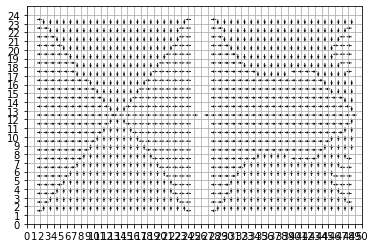

In [7]:
plot_policy(Pi1)

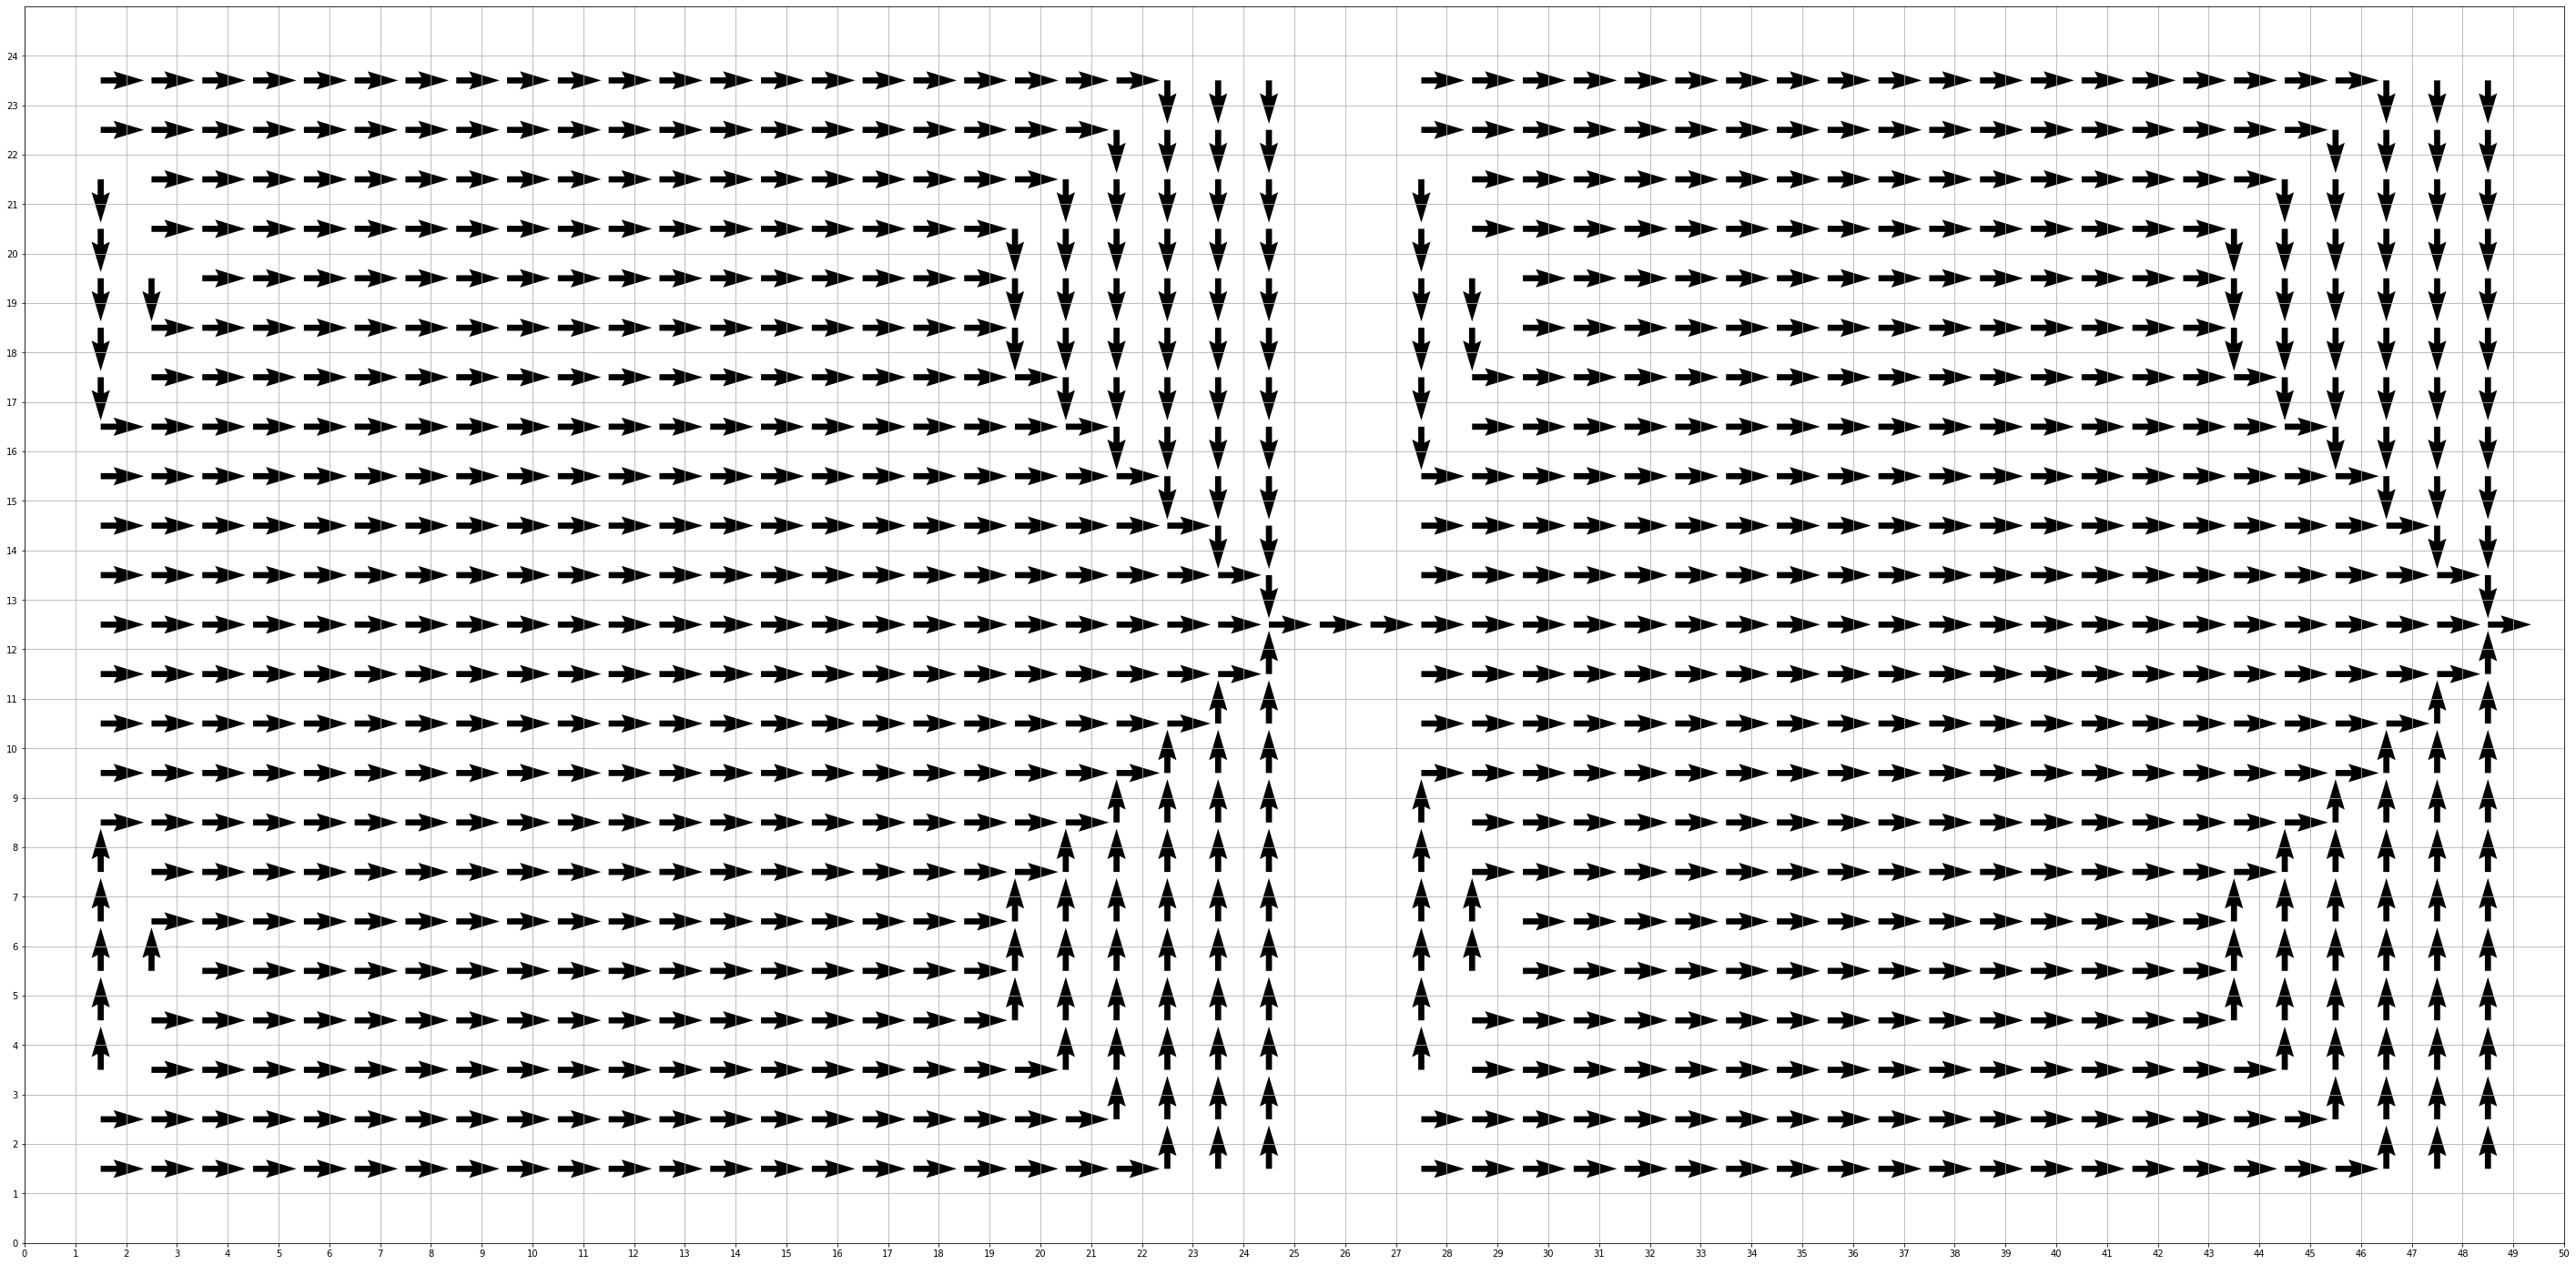

In [8]:
plot_policy(Pi2)

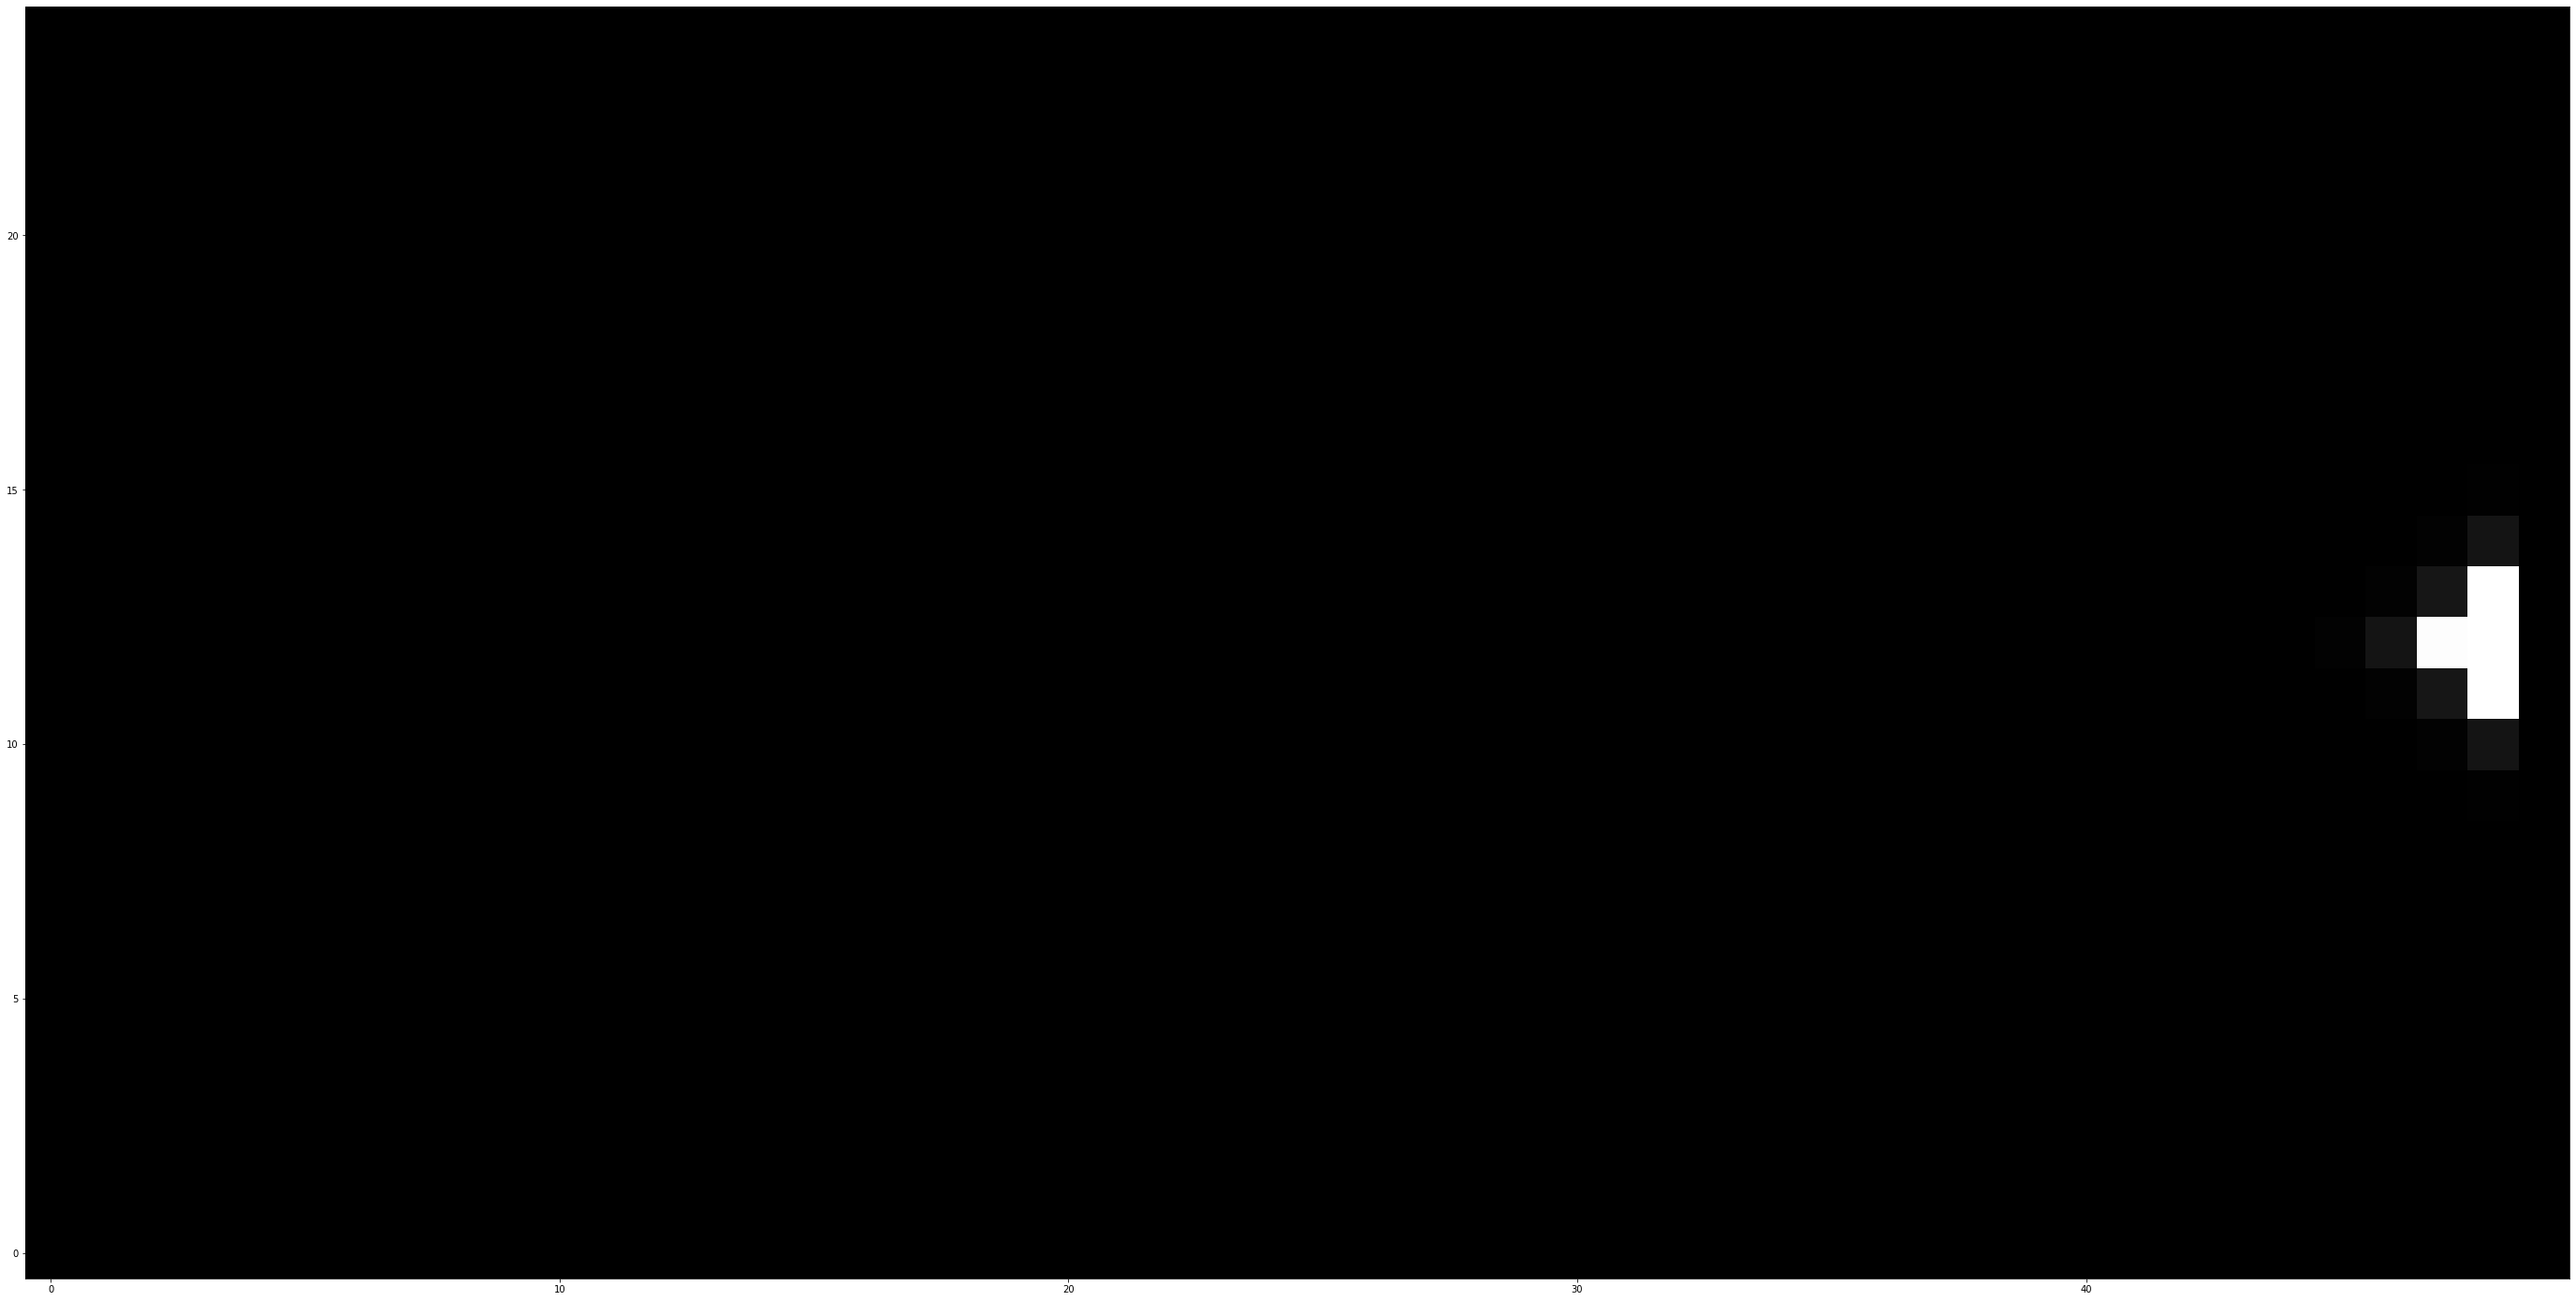

In [9]:
def plot_value(V):
  plt.imshow(V.T, cmap='gray', vmin=np.amin(V), vmax=np.amax(V))
  plt.gca().invert_yaxis()
  plt.show()
plot_value(V1)

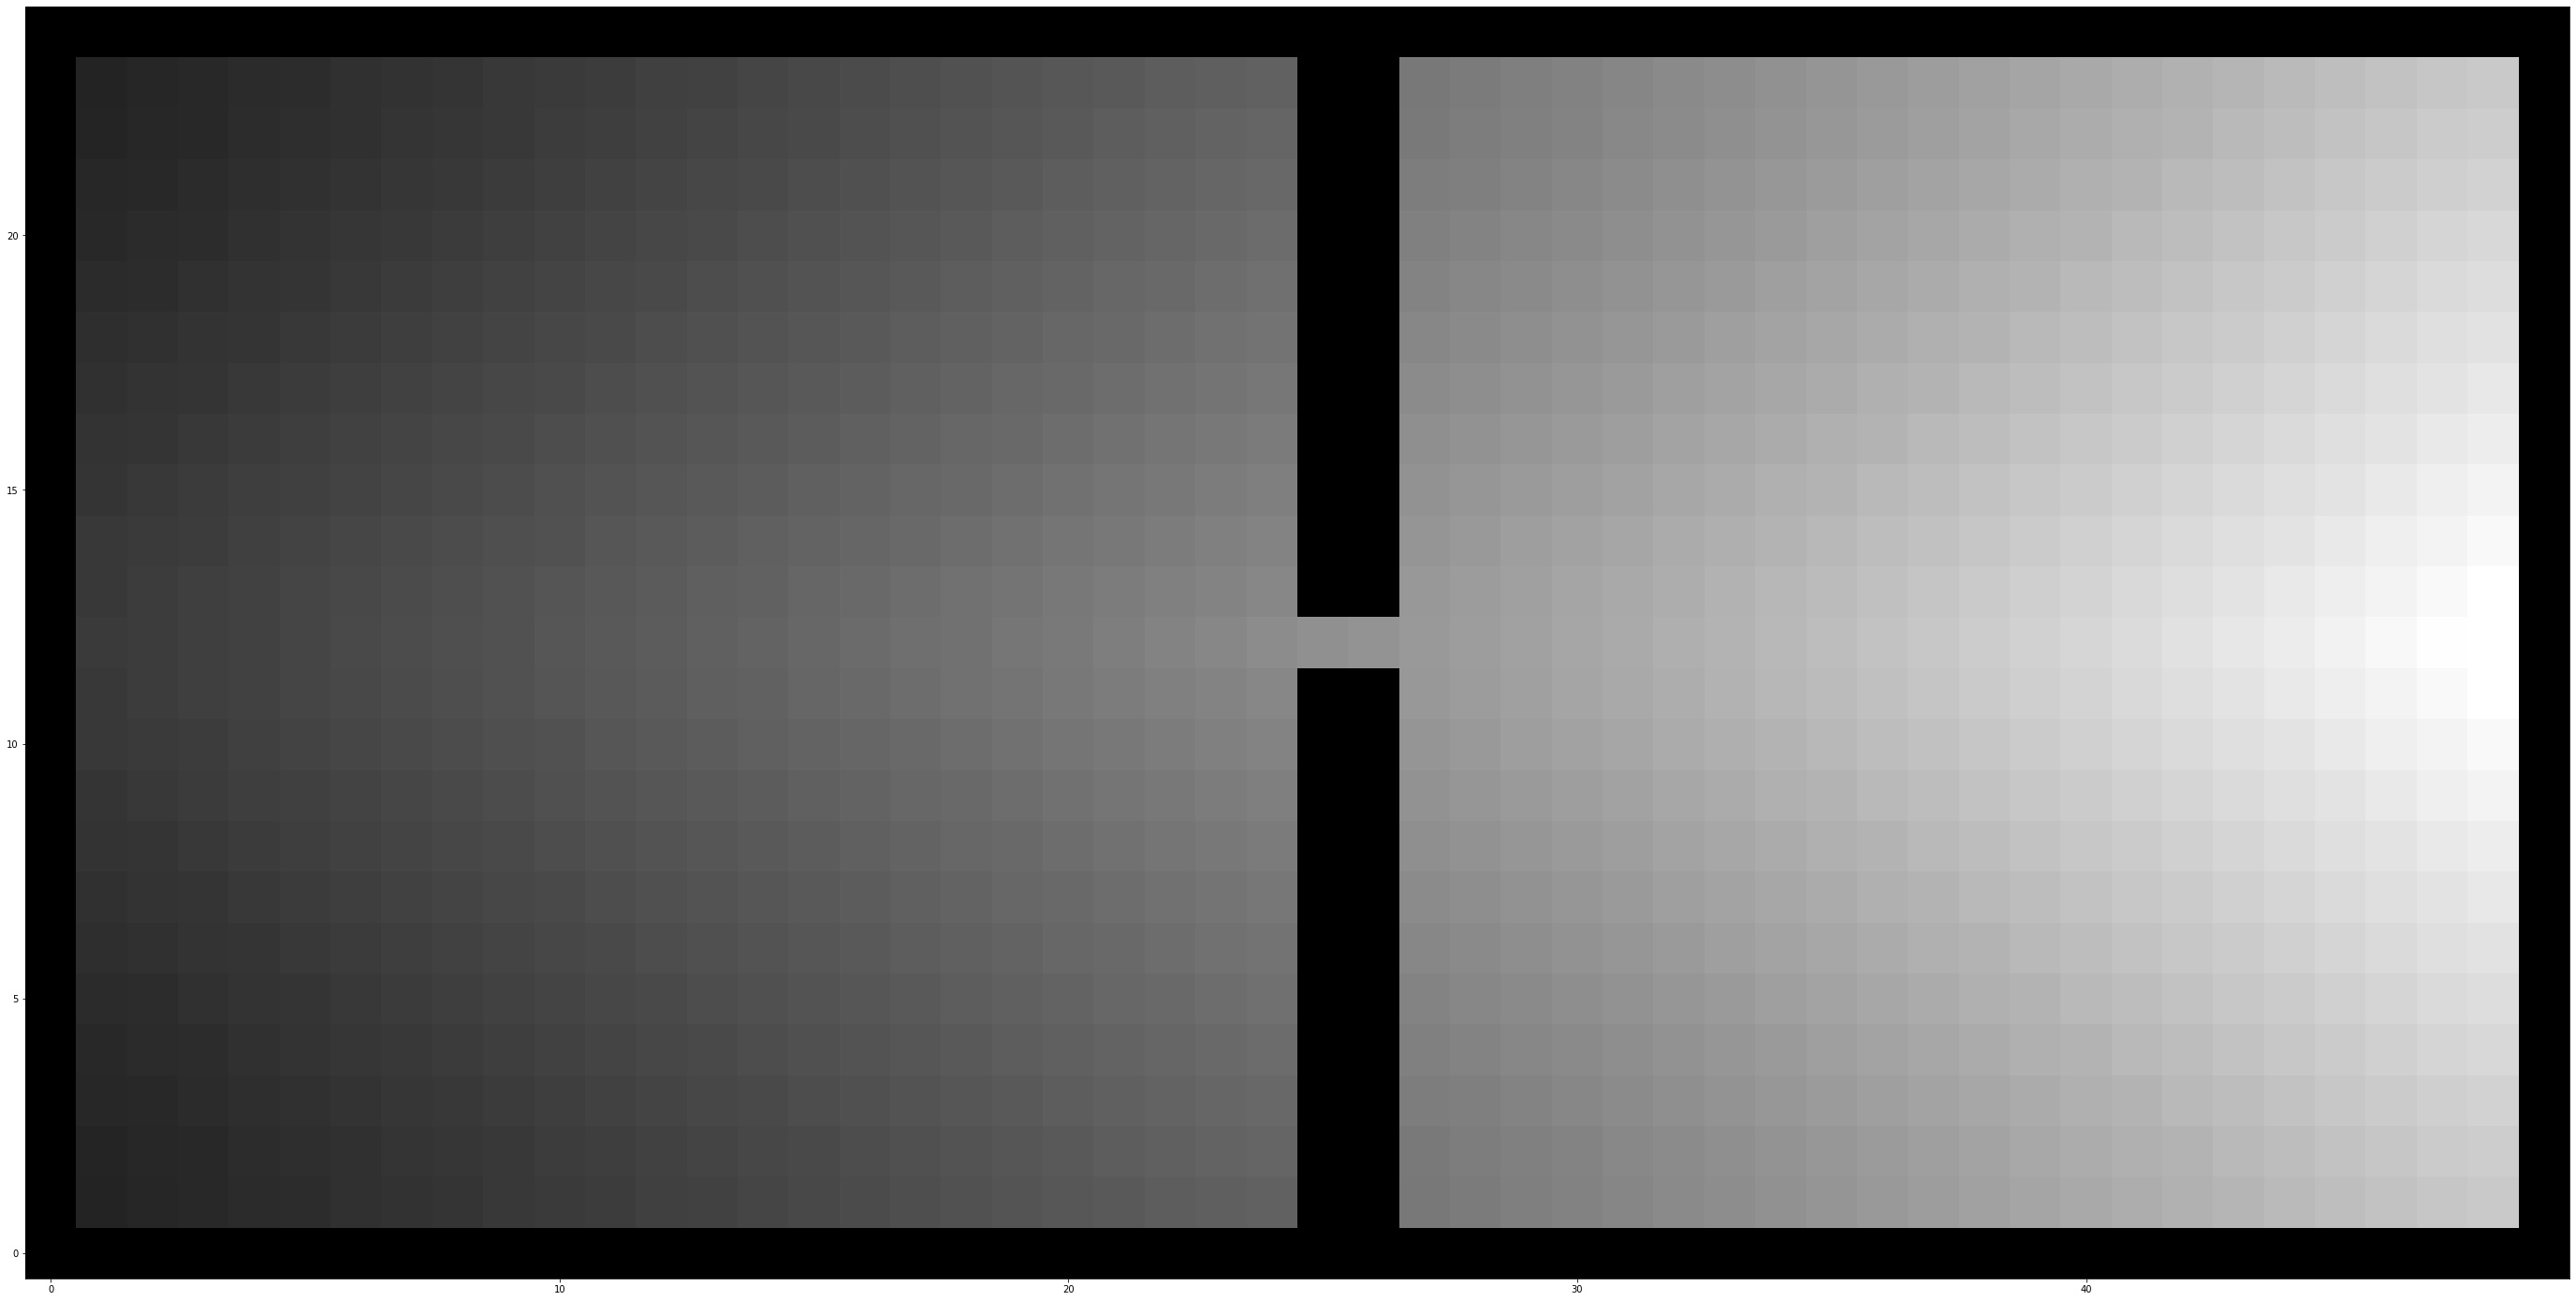

In [10]:
plot_value(V2)

In [11]:
print(np.amin(V1))

-0.14116039021347954


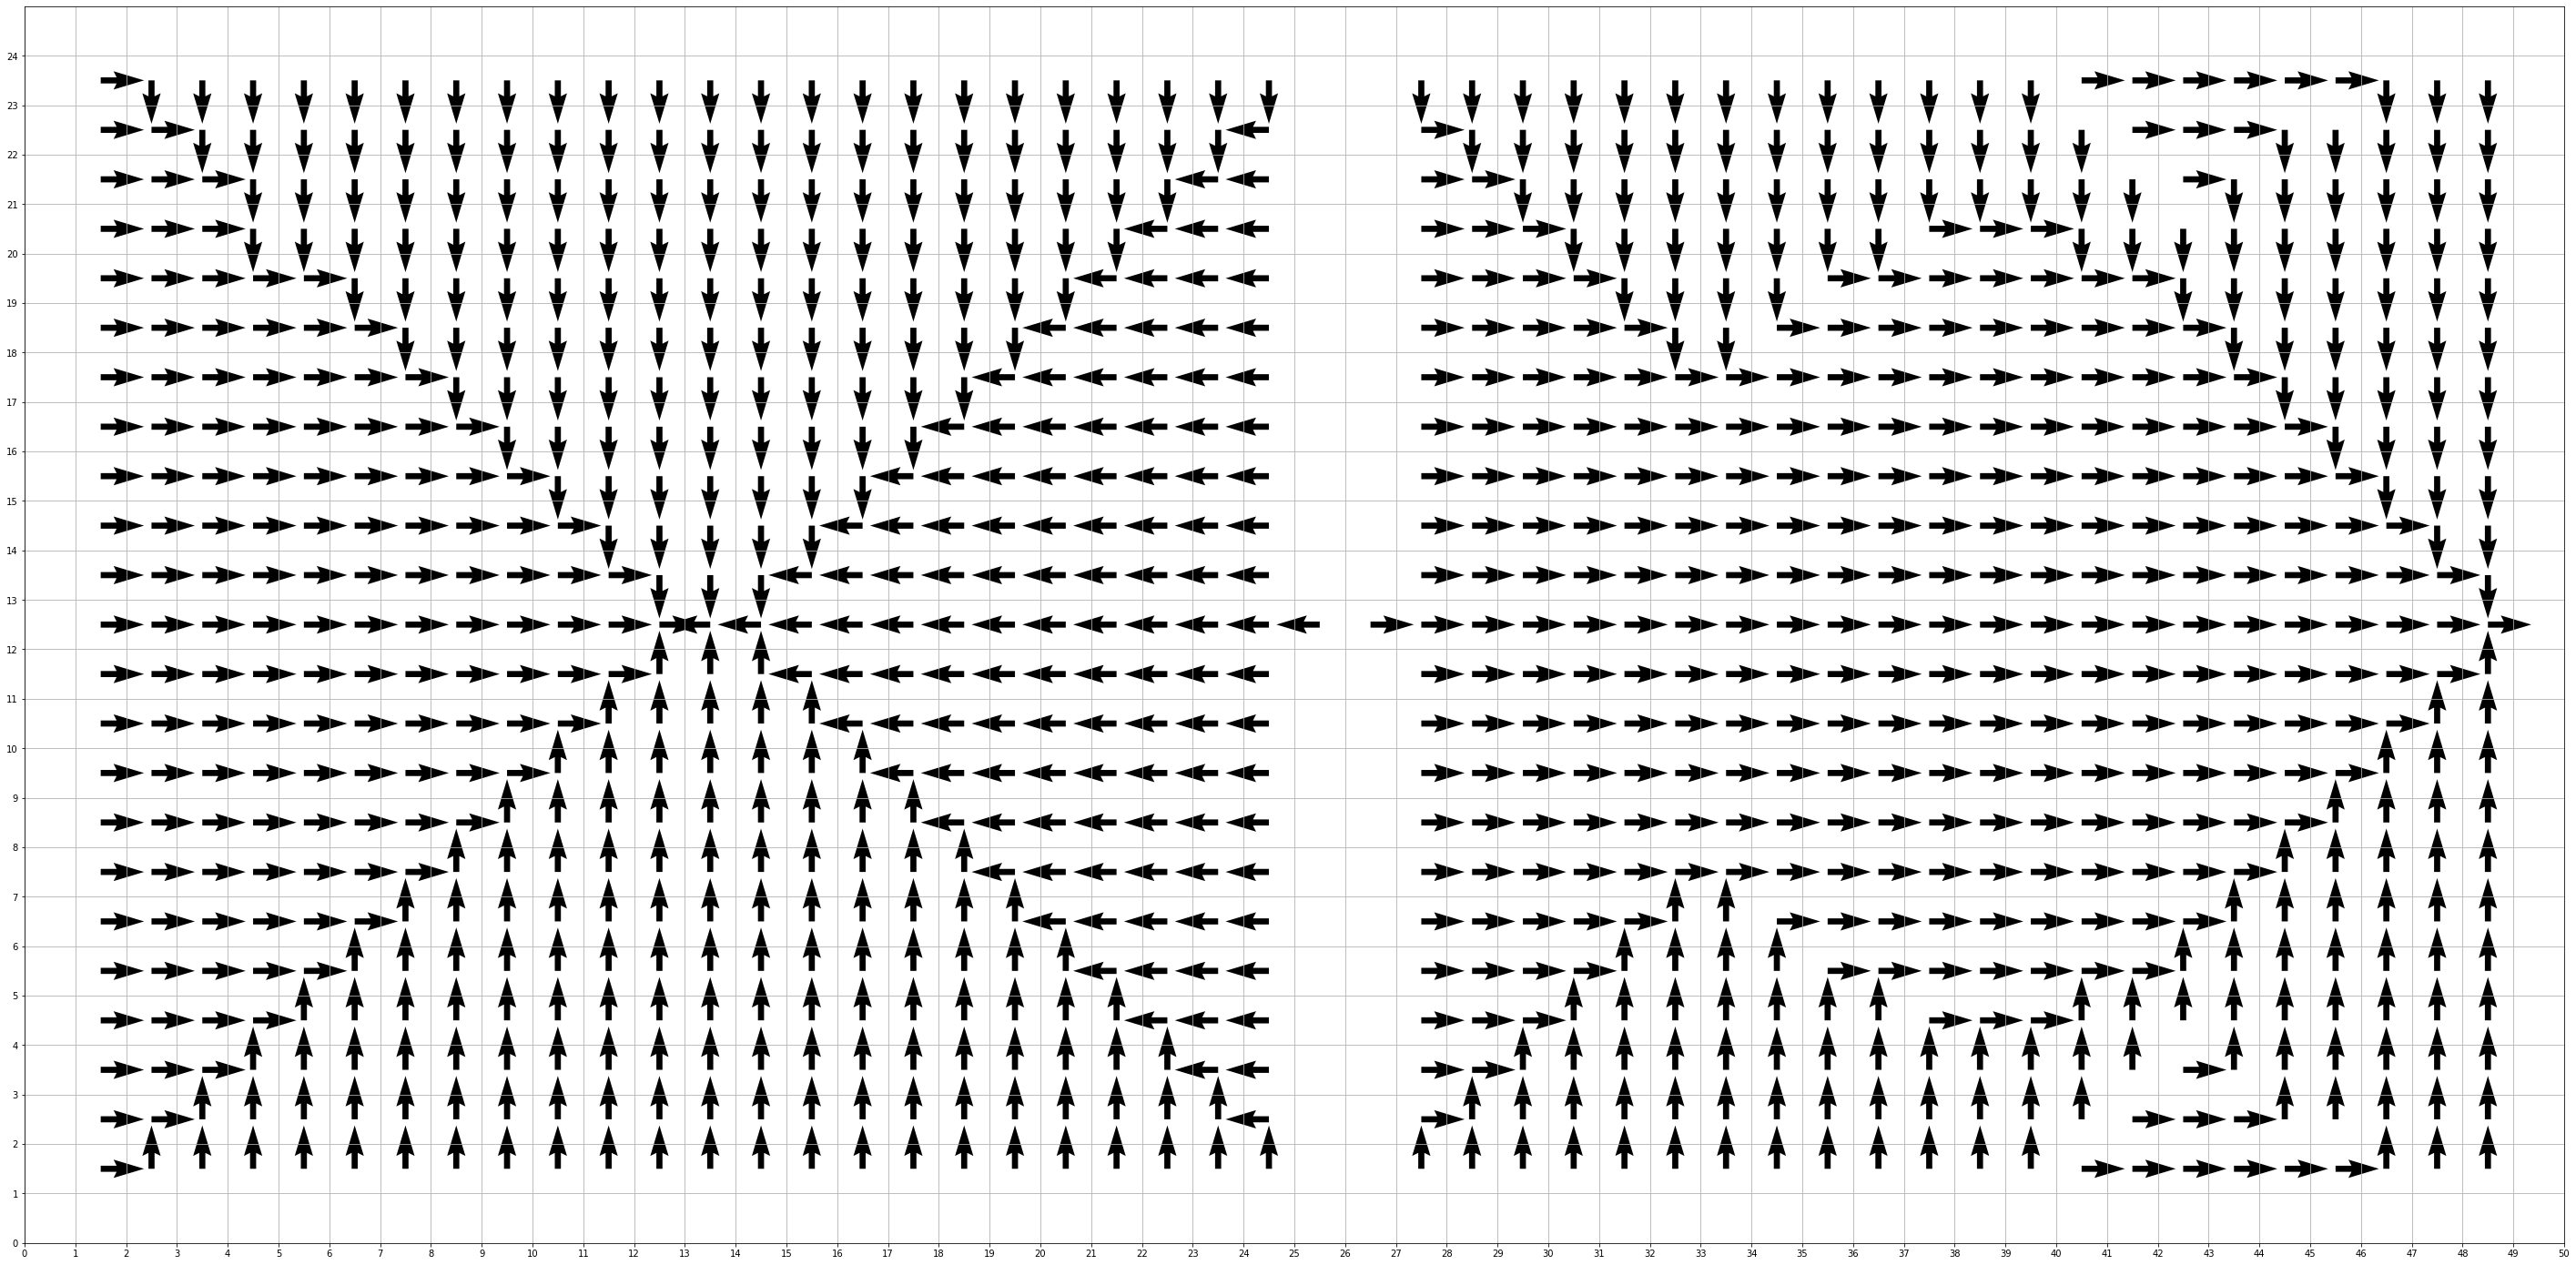

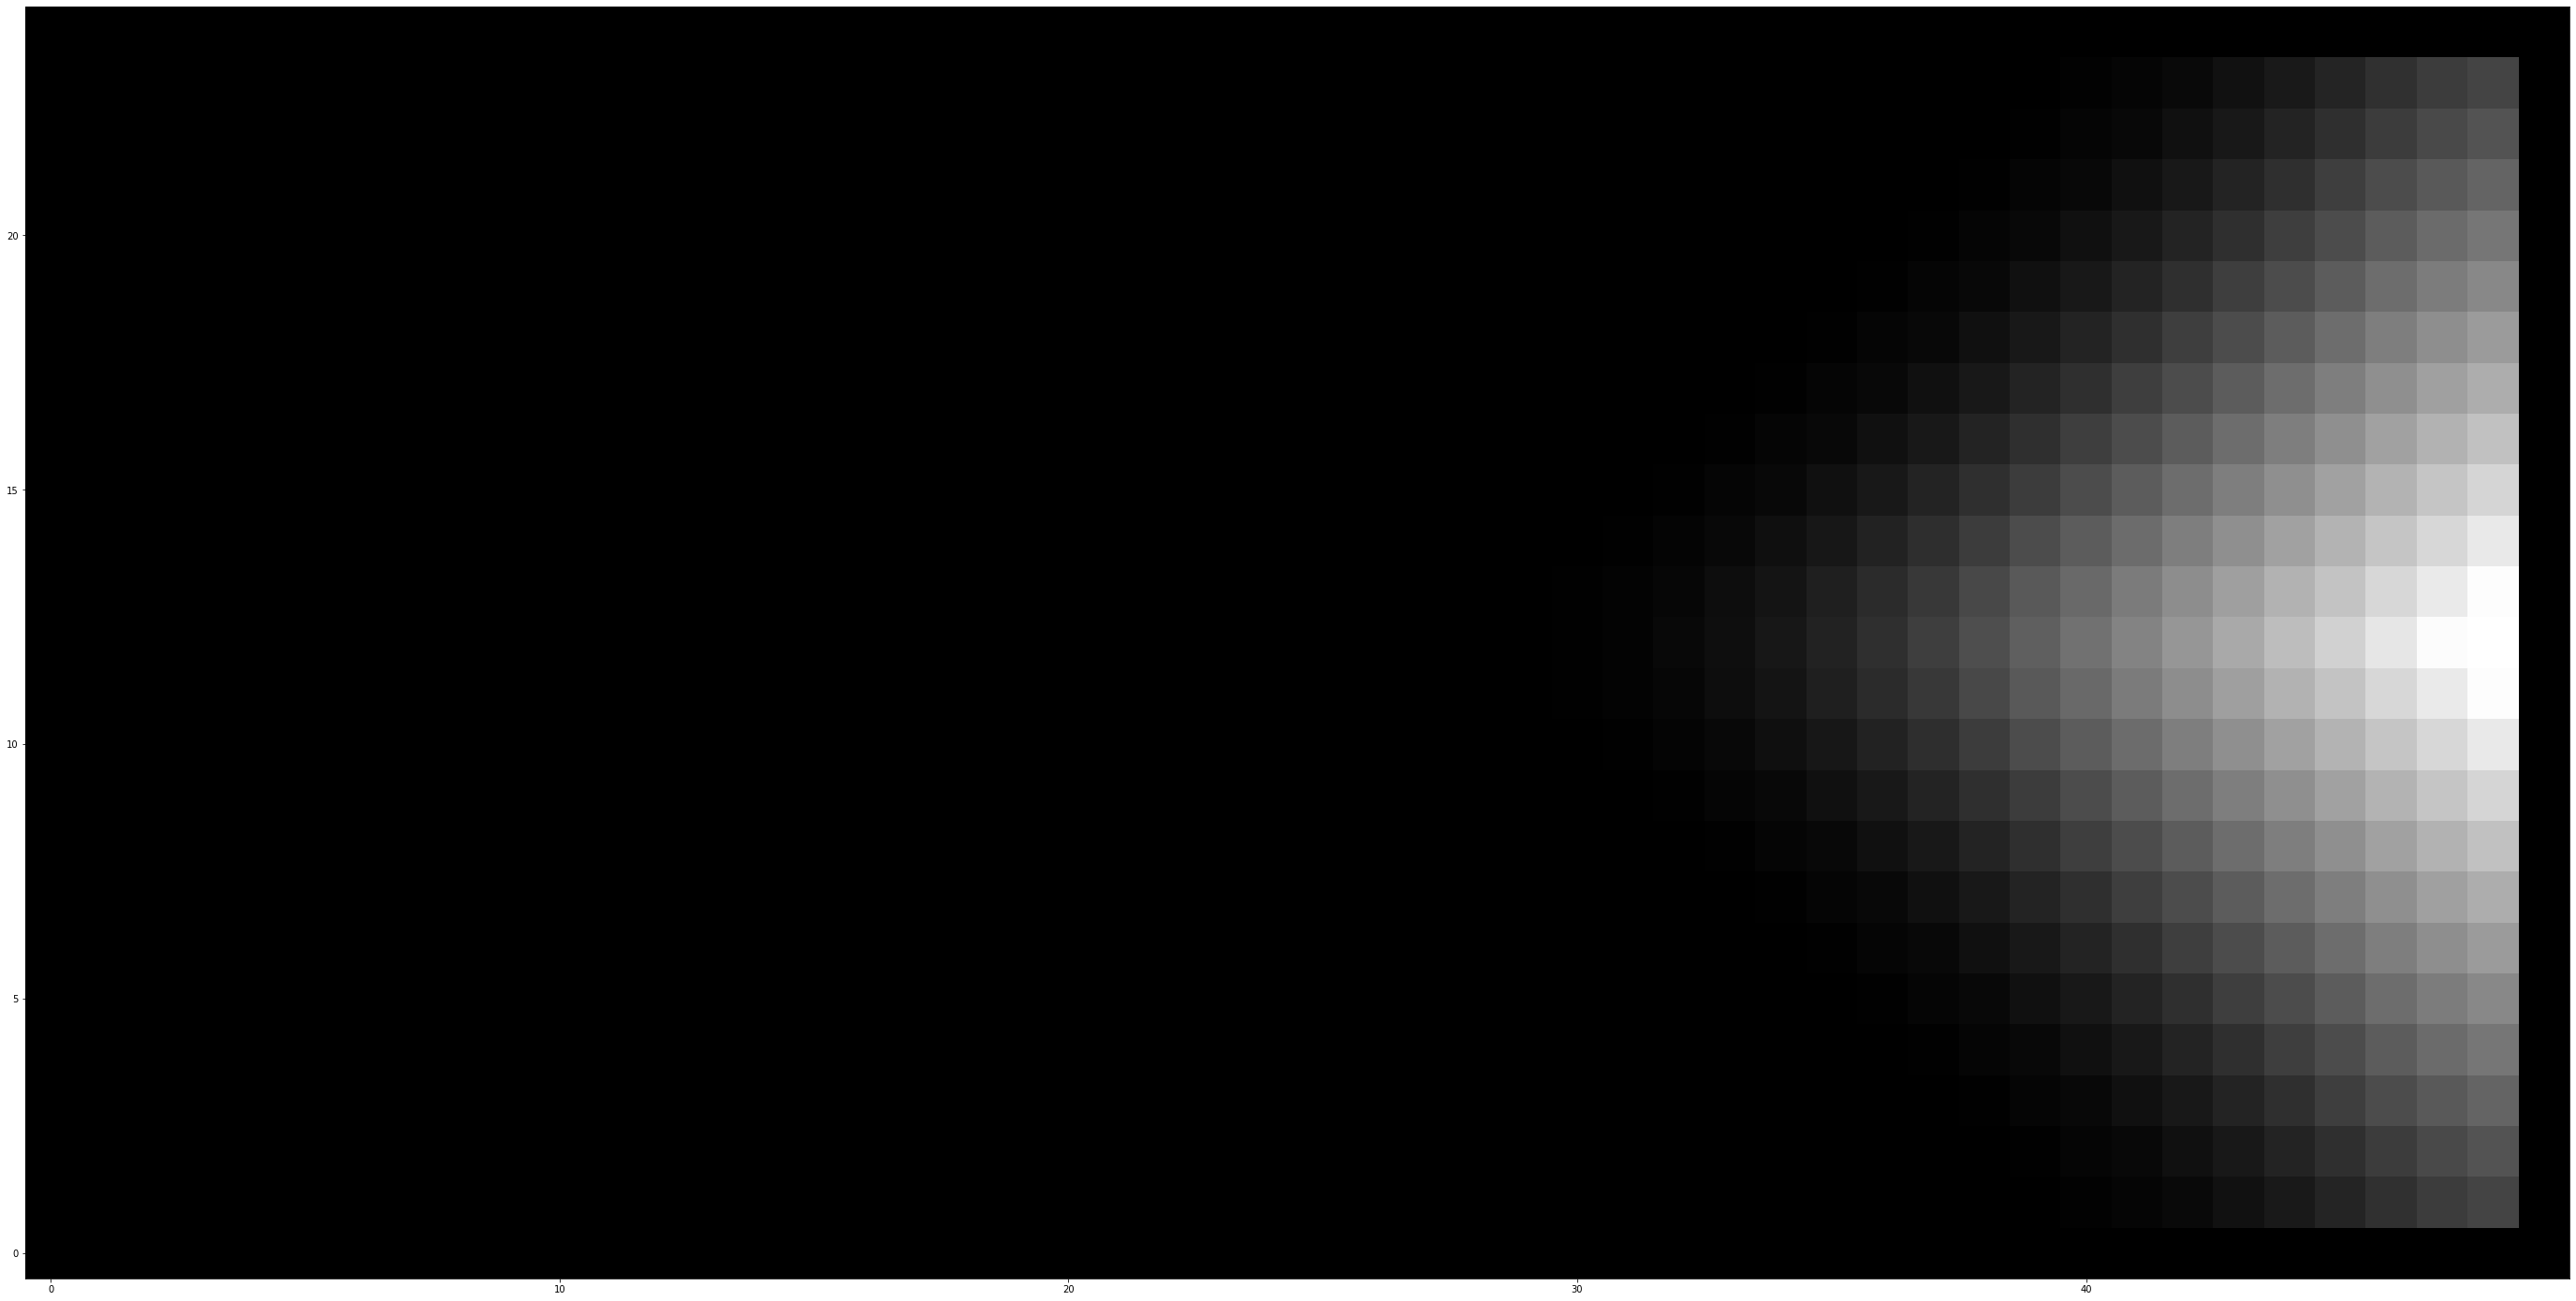

In [12]:
V3, Pi3 = value_iteration(0.99,0.1,20,actions)
plot_policy(Pi3)
plot_value(V3)

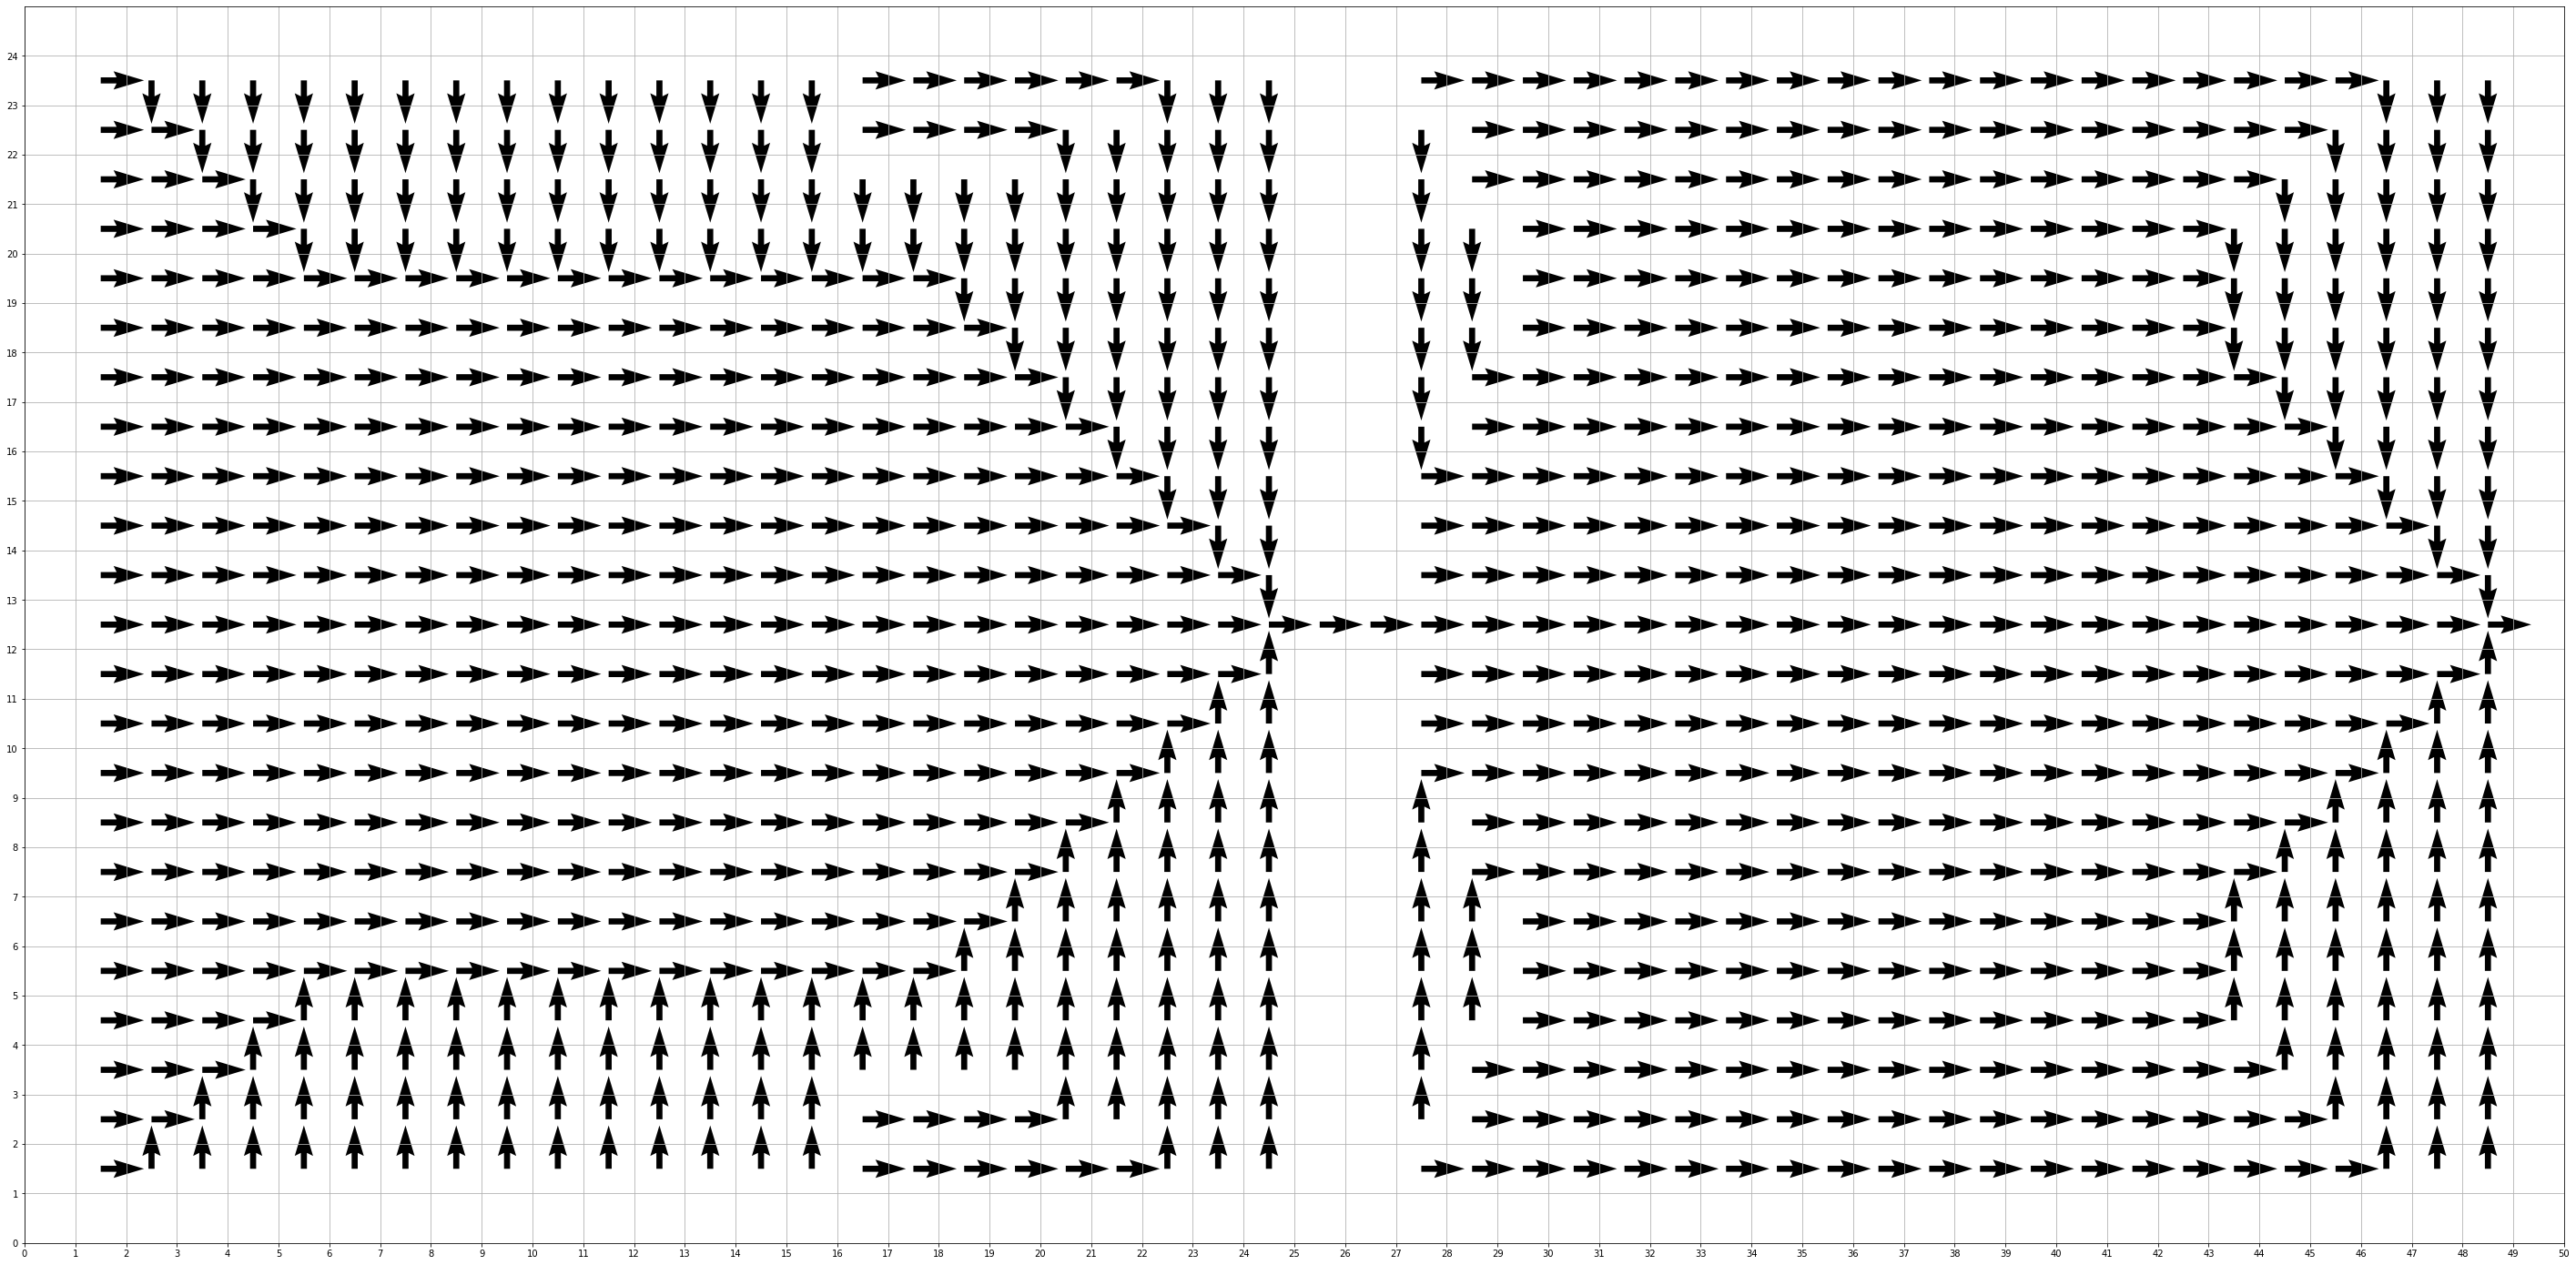

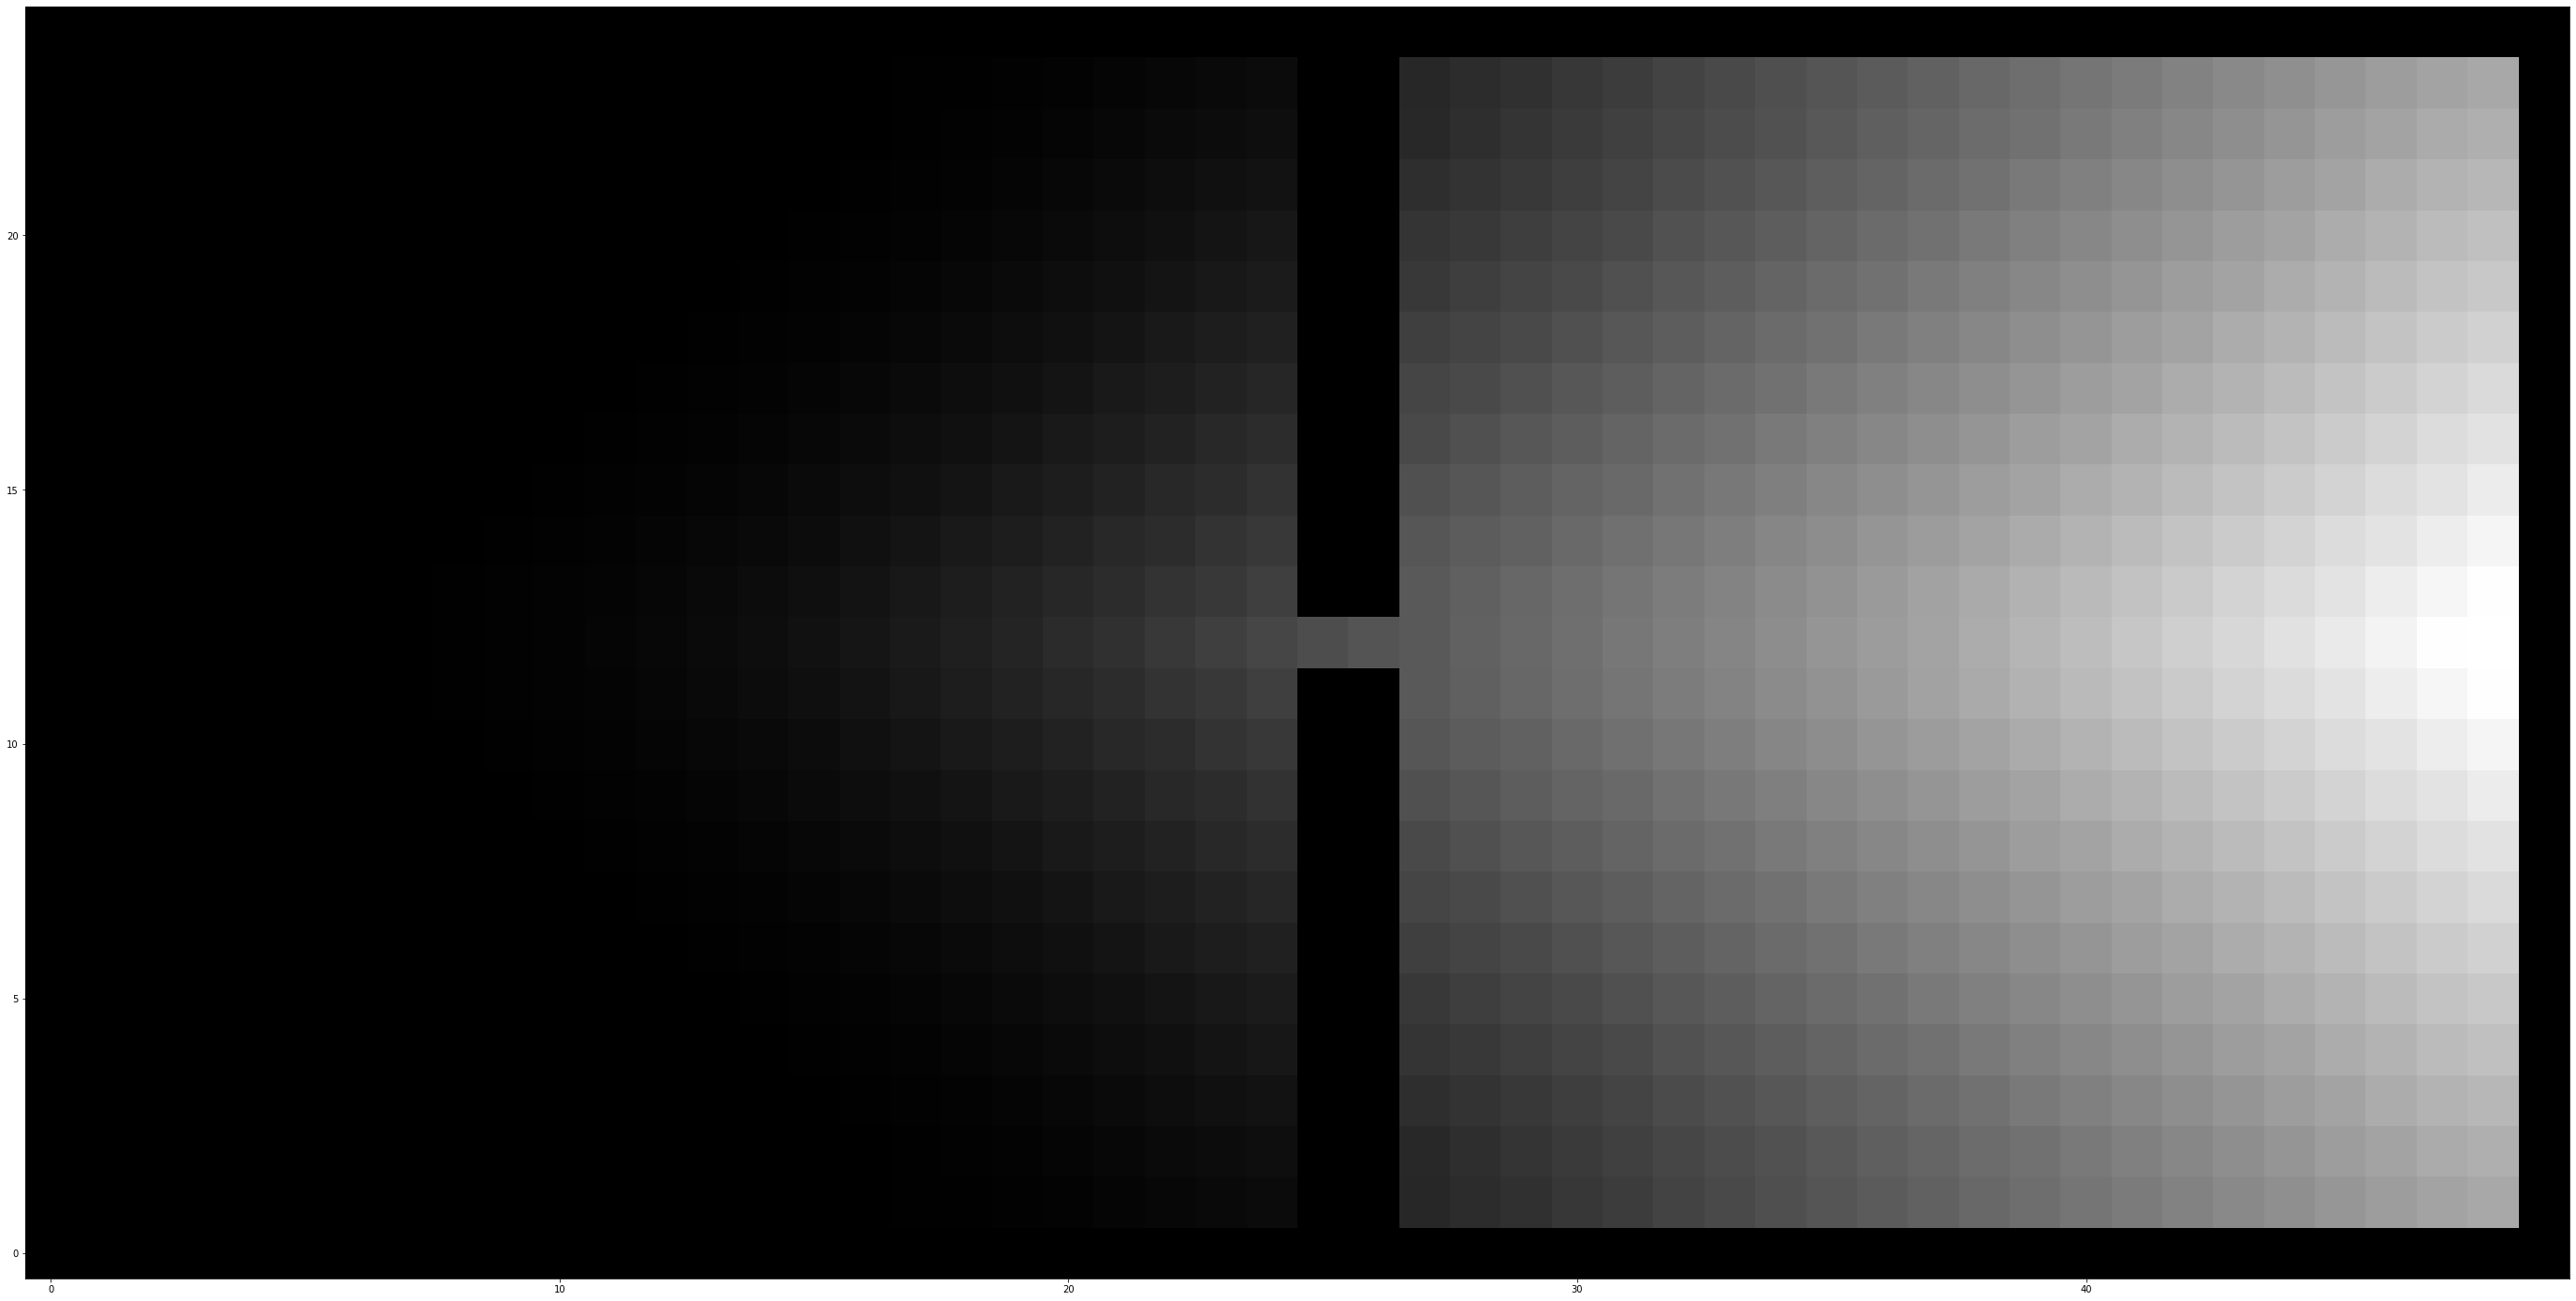

In [13]:
V4, Pi4 = value_iteration(0.99,0.1,50,actions)
plot_policy(Pi4)
plot_value(V4)

In [14]:
def move(x, y, dir):
  xf = x
  yf = y
  if dir == 0:
    yf = y+1
  elif dir == 1:
    yf = y-1
  elif dir == 2:
    xf = x-1
  else:
    xf = x+1
  if (isWall(xf, yf)):
    return x, y
  else: 
    return xf, yf
def sample(x, y, dir):
# actions = ["up","down","left","right"]
  r = None
  if (dir == 0):
    r = np.random.choice(np.arange(0, 4), p=[0.8, 0.2/3, 0.2/3, 0.2/3])
  elif (dir == 1):
    r = np.random.choice(np.arange(0, 4), p=[0.2/3, 0.8, 0.2/3, 0.2/3])
  elif (dir == 2):
    r = np.random.choice(np.arange(0, 4), p=[0.2/3, 0.2/3, 0.8, 0.2/3])
  else:
    r = np.random.choice(np.arange(0, 4), p=[0.2/3, 0.2/3, 0.2/3, 0.8])
  return move(x, y, r)

In [15]:
def simulate_policy(pi, x, y, T = 1000, N = 200):

  visitation_count = np.zeros((50,25))

  for i in range(0, N):
    xp = x
    yp = y
    visitation_count[xp][yp] += 1
    for j in range(0, T):
      action = pi[xp][yp]
      xp, yp = sample(xp, yp, action)
      visitation_count[xp][yp] += 1

  visitation_count = visitation_count / 200
  return visitation_count


In [16]:
visitation_count = simulate_policy(Pi2, 1, 1,70)

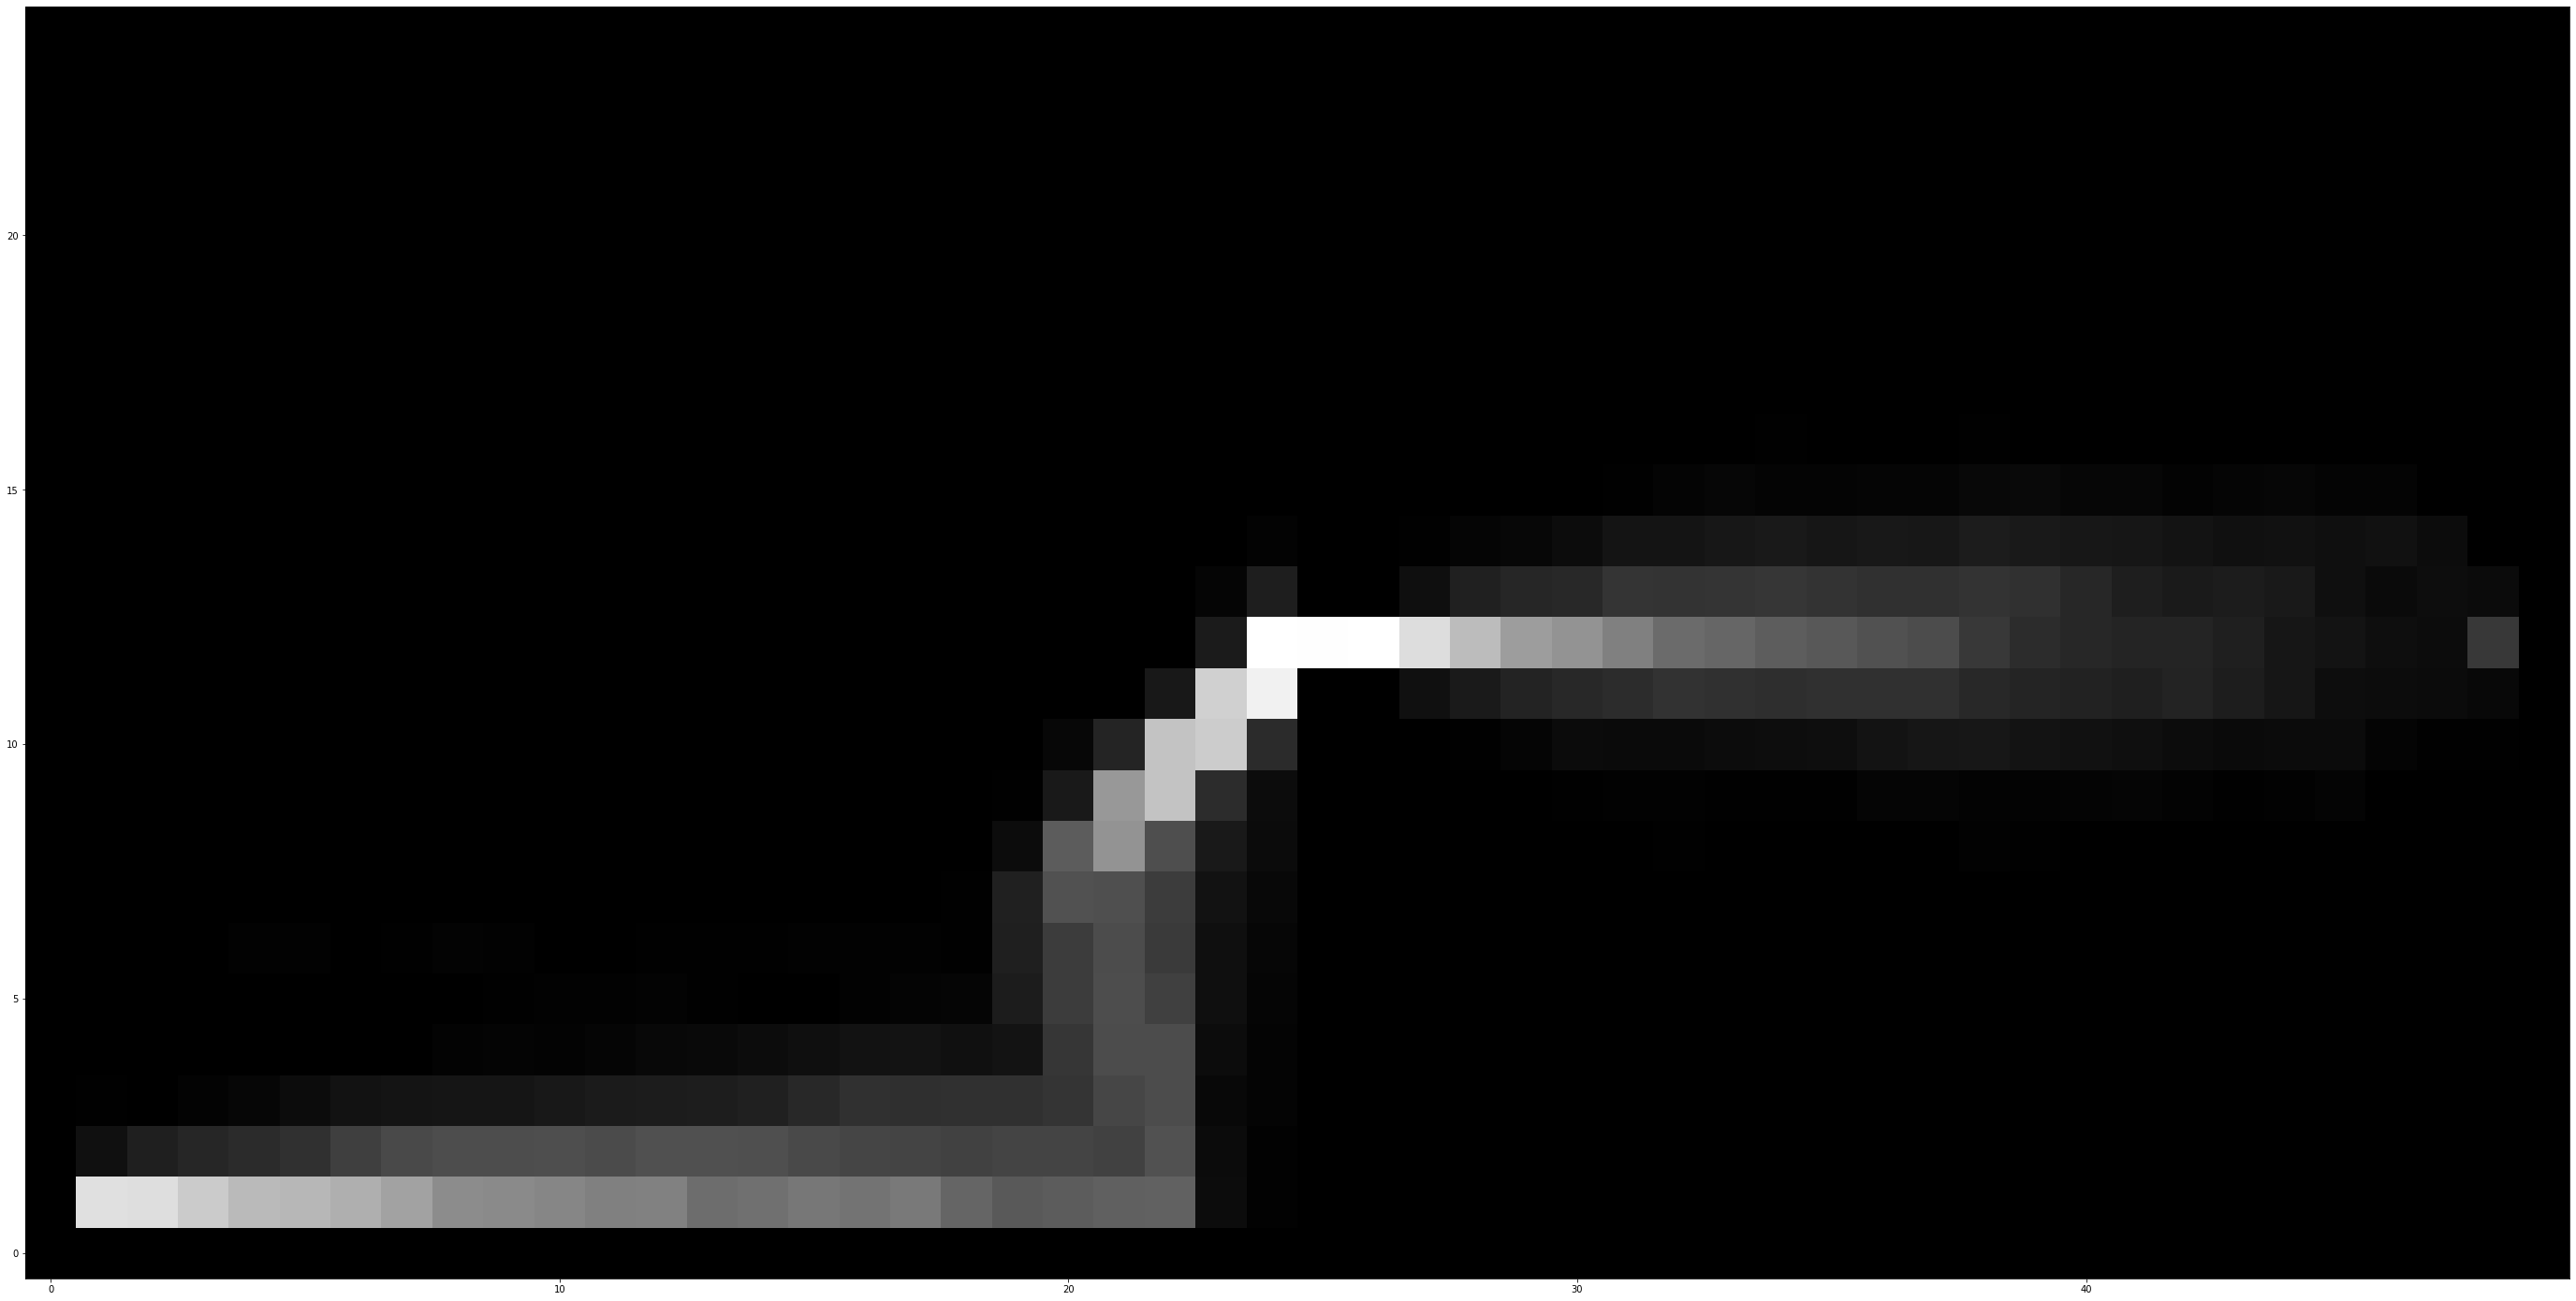

In [17]:
plt.imshow(visitation_count.T, cmap='gray', vmin=np.amin(visitation_count), vmax=np.amax(visitation_count))
plt.gca().invert_yaxis()
plt.show()

In [18]:
def value_iteration_d(gamma, threshold, T, actions):
  V = np.random.uniform(0,0,(50,25))
  
  Policy = []
  y=[]
  x=[]
  for t in range(0,T):
    delta = 0
    U = copy.deepcopy(V)
    Pi = np.zeros((50,25))-1
    for i in range(0,50):
      for j in range(0,25):
        if isWall(i,j):
          continue
        max1 = -1e6
        for action in actions:
          sum1 = 0
          if isWall(i+1,j):
            sum1 = sum1 + transition(i,j,action,i+1,j)*(reward(i+1,j)+gamma*U[i][j])
          else:
            sum1 = sum1 + transition(i,j,action,i+1,j)*(reward(i+1,j)+gamma*U[i+1][j])
          if isWall(i-1,j):
            sum1 = sum1 + transition(i,j,action,i-1,j)*(reward(i-1,j)+gamma*U[i][j])
          else:
            sum1 = sum1 + transition(i,j,action,i-1,j)*(reward(i-1,j)+gamma*U[i-1][j])
          if isWall(i,j+1):
            sum1 = sum1 + transition(i,j,action,i,j+1)*(reward(i,j+1)+gamma*U[i][j])
          else:
            sum1 = sum1 + transition(i,j,action,i,j+1)*(reward(i,j+1)+gamma*U[i][j+1])
          if isWall(i,j-1):
            sum1 = sum1 + transition(i,j,action,i,j-1)*(reward(i,j-1)+gamma*U[i][j])
          else:
            sum1 = sum1 + transition(i,j,action,i,j-1)*(reward(i,j-1)+gamma*U[i][j-1])
          max1 = max(max1,sum1)
        V[i][j] = max1
        delta = max(delta,abs(V[i][j]-U[i][j]))
    y.append(delta)
    x.append(t+1)
    for i in range(0,50):
      for j in range(0,25):
        if isWall(i,j):
          continue
        max1 = -1e6
        count1 = 0
        for action in actions:
          
          sum1 = 0
          if isWall(i+1,j):
            sum1 = sum1 + transition(i,j,action,i+1,j)*(reward(i+1,j)+gamma*U[i][j])
          else:
            sum1 = sum1 + transition(i,j,action,i+1,j)*(reward(i+1,j)+gamma*U[i+1][j])
          if isWall(i-1,j):
            sum1 = sum1 + transition(i,j,action,i-1,j)*(reward(i-1,j)+gamma*U[i][j])
          else:
            sum1 = sum1 + transition(i,j,action,i-1,j)*(reward(i-1,j)+gamma*U[i-1][j])
          if isWall(i,j+1):
            sum1 = sum1 + transition(i,j,action,i,j+1)*(reward(i,j+1)+gamma*U[i][j])
          else:
            sum1 = sum1 + transition(i,j,action,i,j+1)*(reward(i,j+1)+gamma*U[i][j+1])
          if isWall(i,j-1):
            sum1 = sum1 + transition(i,j,action,i,j-1)*(reward(i,j-1)+gamma*U[i][j])
          else:
            sum1 = sum1 + transition(i,j,action,i,j-1)*(reward(i,j-1)+gamma*U[i][j-1])
          max1 = max(max1,sum1)
          if max1 == sum1:
            Pi[i][j] = count1
          count1+=1
    Policy.append(Pi)

    # if(delta<threshold):
    #   print(t)
    #   break
  y2 = np.zeros(T)+threshold
  plt.xlabel('Time steps')
  plt.ylabel('Delta')
  plt.rcParams["figure.figsize"] = (5,5)
  # plt.ylim(0,5)
  # plt.xlim(0,5)
  plt.plot(x,y,label = 'max norm')
  plt.plot(x,y2, label = 'threshold')
  plt.legend()
  plt.show()
  return V,Policy

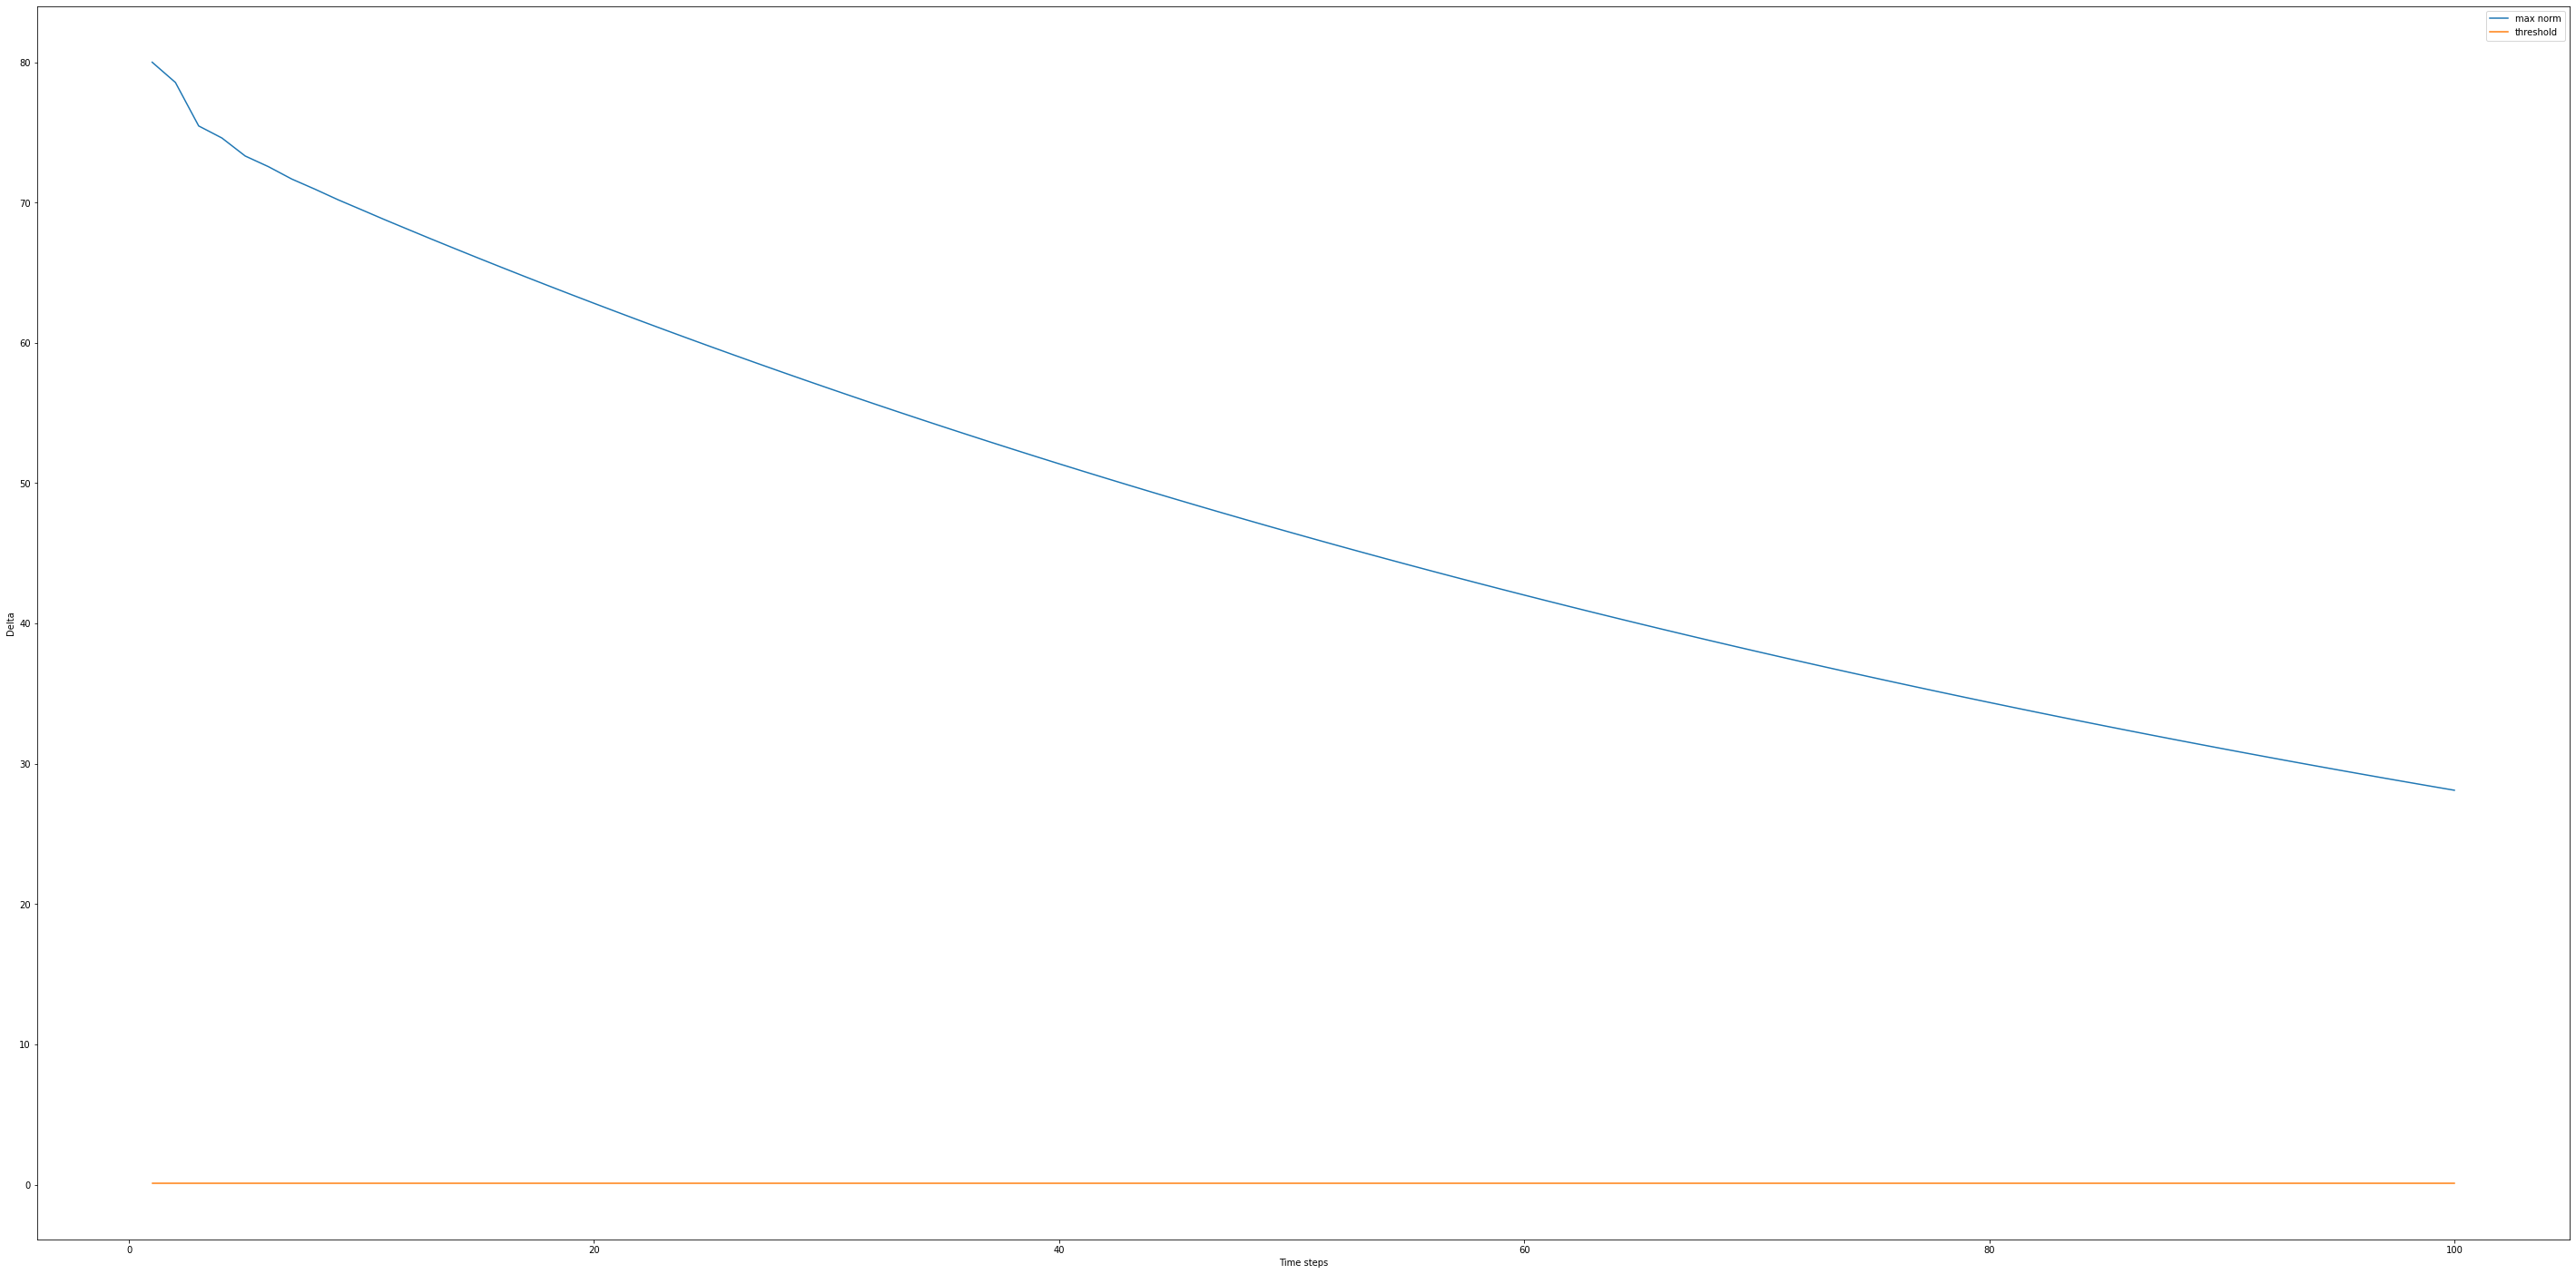

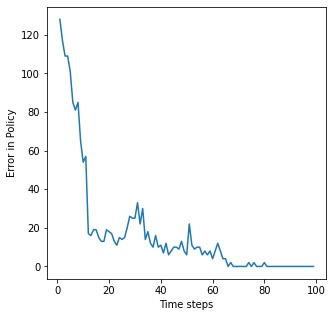

In [19]:
V,Policy = value_iteration_d(0.99,0.1,100,actions)
y = []
x = []
for t in range(1,len(Policy)):
  x.append(t)
  y.append(1250-np.sum(Policy[t]==Policy[t-1]))
plt.rcParams["figure.figsize"] = (5,5)
plt.xlabel('Time steps')
plt.ylabel('Error in Policy')
plt.plot(x,y)
plt.show()

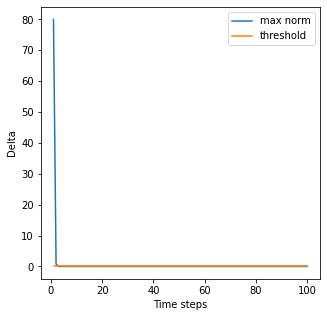

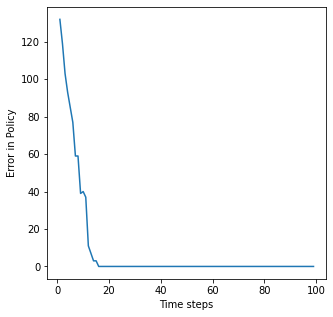

In [20]:
V,Policy = value_iteration_d(0.01,0.1,100,actions)
y = []
x = []
for t in range(1,len(Policy)):
  x.append(t)
  y.append(1250-np.sum(Policy[t]==Policy[t-1]))
plt.xlabel('Time steps')
plt.ylabel('Error in Policy')
plt.plot(x,y)
plt.show()